In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.callbacks import EarlyStopping

from lightgbm import LGBMRegressor
import random
import xgboost as xgb

In [2]:
curr_dir = os.getcwd()
curr_dir

'C:\\weather\\smart_farm'

In [3]:
forders_tr = os.listdir(curr_dir+"\\data")
forders_tr

['smart_farm.csv']

In [4]:
# train = pd.DataFrame()

# for files in s:
#     df= pd.read_csv(os.path.join(curr_dir+"\\data\\"+"\\fin_train_val\\")+files)
#     train = pd.concat([train, df])
    
# train.drop('idx', axis=1, inplace=True)
# train

In [5]:
df = pd.read_csv(os.path.join(curr_dir+"\\data\\")+forders_tr[0])
df = df.drop(df.columns[0], axis=1)
df

,smart_farm.yy,smart_farm.mm,smart_farm.dd,smart_farm.hh,smart_farm.nn,smart_farm.insolation,smart_farm.out_tmperature,smart_farm.out_humidity,smart_farm.wind_speed,smart_farm.wind_direction,...,smart_farm.shield_tmperature_h,smart_farm.shield_energy_h,smart_farm.shield_energy_v,smart_farm.exhaust_fan,smart_farm.ceiling,smart_farm.floating_fan,smart_farm.fan_coil_b_site,smart_farm.ventilation_temperature_control,smart_farm.heating_temperature_set_up,smart_farm.heat_supply
0,2021,11,26,0,0,-2.7,5.8,67,0.0,325,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
1,2021,11,26,0,1,-2.9,5.8,67,0.4,344,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
2,2021,11,26,0,2,-3.0,5.7,67,0.9,105,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.9
3,2021,11,26,0,3,-3.0,5.7,67,1.3,123,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.8
4,2021,11,26,0,4,-2.8,5.7,67,0.9,123,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152635,2022,3,20,23,55,-3.0,6.2,61,0.4,344,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN
152636,2022,3,20,23,56,-3.2,6.2,61,0.0,344,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN
152637,2022,3,20,23,57,-3.2,6.1,61,0.4,344,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN
152638,2022,3,20,23,58,-3.3,6.1,61,0.4,346,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN


In [6]:
df2022 = df[df['smart_farm.yy']==2022]
df2022
df202203 = df2022[df2022['smart_farm.mm']==3]
df202203
# test = test.reset_index()
# test = test.drop('index', axis=1)
# test

,smart_farm.yy,smart_farm.mm,smart_farm.dd,smart_farm.hh,smart_farm.nn,smart_farm.insolation,smart_farm.out_tmperature,smart_farm.out_humidity,smart_farm.wind_speed,smart_farm.wind_direction,...,smart_farm.shield_tmperature_h,smart_farm.shield_energy_h,smart_farm.shield_energy_v,smart_farm.exhaust_fan,smart_farm.ceiling,smart_farm.floating_fan,smart_farm.fan_coil_b_site,smart_farm.ventilation_temperature_control,smart_farm.heating_temperature_set_up,smart_farm.heat_supply
132480,2022,3,4,0,0,-4.0,2.0,76,0.0,5,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
132481,2022,3,4,0,1,-4.1,2.0,76,0.4,5,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
132482,2022,3,4,0,2,-4.1,1.9,76,0.0,5,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
132483,2022,3,4,0,3,-4.1,1.9,76,0.0,5,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
132484,2022,3,4,0,4,-4.2,1.9,76,0.0,5,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152635,2022,3,20,23,55,-3.0,6.2,61,0.4,344,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN
152636,2022,3,20,23,56,-3.2,6.2,61,0.0,344,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN
152637,2022,3,20,23,57,-3.2,6.1,61,0.4,344,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN
152638,2022,3,20,23,58,-3.3,6.1,61,0.4,346,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN


In [7]:
train = df.iloc[:132480]
train = train.reset_index()
train = train.drop('index', axis=1)

test = df.iloc[132480:]
test = test[test['smart_farm.dd']!=15]        # 15일자 제외
test = test.reset_index()
test = test.drop('index', axis=1)
test

,smart_farm.yy,smart_farm.mm,smart_farm.dd,smart_farm.hh,smart_farm.nn,smart_farm.insolation,smart_farm.out_tmperature,smart_farm.out_humidity,smart_farm.wind_speed,smart_farm.wind_direction,...,smart_farm.shield_tmperature_h,smart_farm.shield_energy_h,smart_farm.shield_energy_v,smart_farm.exhaust_fan,smart_farm.ceiling,smart_farm.floating_fan,smart_farm.fan_coil_b_site,smart_farm.ventilation_temperature_control,smart_farm.heating_temperature_set_up,smart_farm.heat_supply
0,2022,3,4,0,0,-4.0,2.0,76,0.0,5,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
1,2022,3,4,0,1,-4.1,2.0,76,0.4,5,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
2,2022,3,4,0,2,-4.1,1.9,76,0.0,5,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
3,2022,3,4,0,3,-4.1,1.9,76,0.0,5,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
4,2022,3,4,0,4,-4.2,1.9,76,0.0,5,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18715,2022,3,20,23,55,-3.0,6.2,61,0.4,344,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN
18716,2022,3,20,23,56,-3.2,6.2,61,0.0,344,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN
18717,2022,3,20,23,57,-3.2,6.1,61,0.4,344,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN
18718,2022,3,20,23,58,-3.3,6.1,61,0.4,346,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN


In [8]:
# mask = train.isna()
# train1 = train[~mask]
# train1.info()
train1 = train.dropna(axis=0)
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130816 entries, 0 to 132479
Data columns (total 23 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   smart_farm.yy                               130816 non-null  int64  
 1   smart_farm.mm                               130816 non-null  int64  
 2   smart_farm.dd                               130816 non-null  int64  
 3   smart_farm.hh                               130816 non-null  int64  
 4   smart_farm.nn                               130816 non-null  int64  
 5   smart_farm.insolation                       130816 non-null  float64
 6   smart_farm.out_tmperature                   130816 non-null  float64
 7   smart_farm.out_humidity                     130816 non-null  int64  
 8   smart_farm.wind_speed                       130816 non-null  float64
 9   smart_farm.wind_direction                   130816 non-null  int64  
 

<AxesSubplot:>

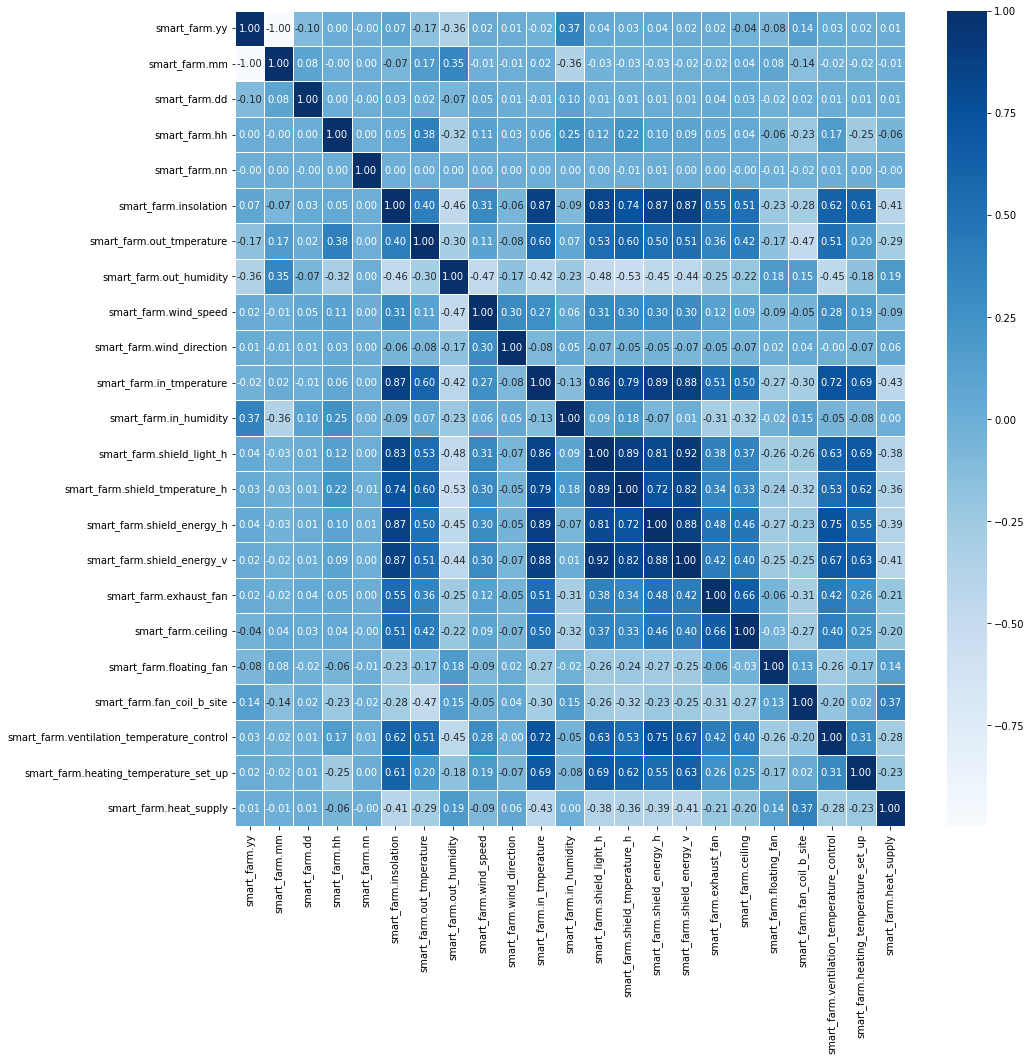

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(data = train1.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [10]:
test.columns

Index(['smart_farm.yy', 'smart_farm.mm', 'smart_farm.dd', 'smart_farm.hh',
       'smart_farm.nn', 'smart_farm.insolation', 'smart_farm.out_tmperature',
       'smart_farm.out_humidity', 'smart_farm.wind_speed',
       'smart_farm.wind_direction', 'smart_farm.in_tmperature',
       'smart_farm.in_humidity', 'smart_farm.shield_light_h',
       'smart_farm.shield_tmperature_h', 'smart_farm.shield_energy_h',
       'smart_farm.shield_energy_v', 'smart_farm.exhaust_fan',
       'smart_farm.ceiling', 'smart_farm.floating_fan',
       'smart_farm.fan_coil_b_site',
       'smart_farm.ventilation_temperature_control',
       'smart_farm.heating_temperature_set_up', 'smart_farm.heat_supply'],
      dtype='object')

In [11]:
'smart_farm.insolation','smart_farm.in_tmperature', 'smart_farm.shield_light_h','smart_farm.shield_tmperature_h', \
'smart_farm.shield_energy_h','smart_farm.shield_energy_v','smart_farm.fan_coil_b_site'

('smart_farm.insolation',
 'smart_farm.in_tmperature',
 'smart_farm.shield_light_h',
 'smart_farm.shield_tmperature_h',
 'smart_farm.shield_energy_h',
 'smart_farm.shield_energy_v',
 'smart_farm.fan_coil_b_site')

In [12]:
test1 = test.interpolate(method ='linear') 
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18720 entries, 0 to 18719
Data columns (total 23 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   smart_farm.yy                               18720 non-null  int64  
 1   smart_farm.mm                               18720 non-null  int64  
 2   smart_farm.dd                               18720 non-null  int64  
 3   smart_farm.hh                               18720 non-null  int64  
 4   smart_farm.nn                               18720 non-null  int64  
 5   smart_farm.insolation                       18720 non-null  float64
 6   smart_farm.out_tmperature                   18720 non-null  float64
 7   smart_farm.out_humidity                     18720 non-null  int64  
 8   smart_farm.wind_speed                       18720 non-null  float64
 9   smart_farm.wind_direction                   18720 non-null  int64  
 10  smart_farm

In [13]:
submission = pd.read_csv('2-1_검증데이터셋.csv')
submission1 = submission.copy()
submission1             # "년도 월 일 시 분 => 년도 월 일"  예측

,yy,mm,dd,heat_supply_day1,heat_supply_day2
0,2022,3,4,NaN,NaN
1,2022,3,5,NaN,NaN
2,2022,3,6,NaN,NaN
3,2022,3,7,NaN,NaN
4,2022,3,8,NaN,NaN
5,2022,3,9,NaN,NaN
6,2022,3,10,NaN,NaN
7,2022,3,11,NaN,NaN
8,2022,3,12,NaN,NaN
9,2022,3,13,NaN,NaN


(array([-1.,  0.,  1.,  2.,  3.,  4.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

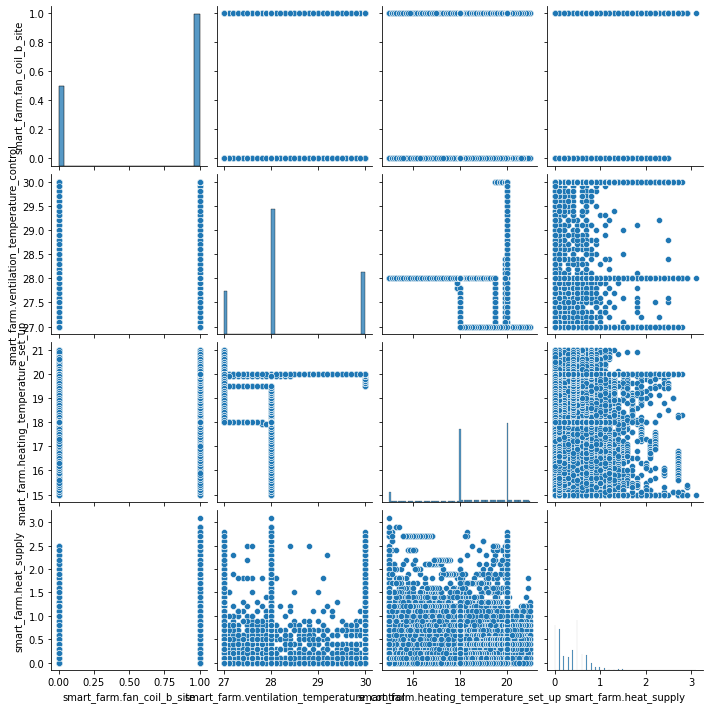

In [53]:
import seaborn as sns          # 열 공급량 무슨 관계?       # set_up
sns.pairplot(train[['smart_farm.fan_coil_b_site',\
       'smart_farm.ventilation_temperature_control',\
       'smart_farm.heating_temperature_set_up', 'smart_farm.heat_supply']])

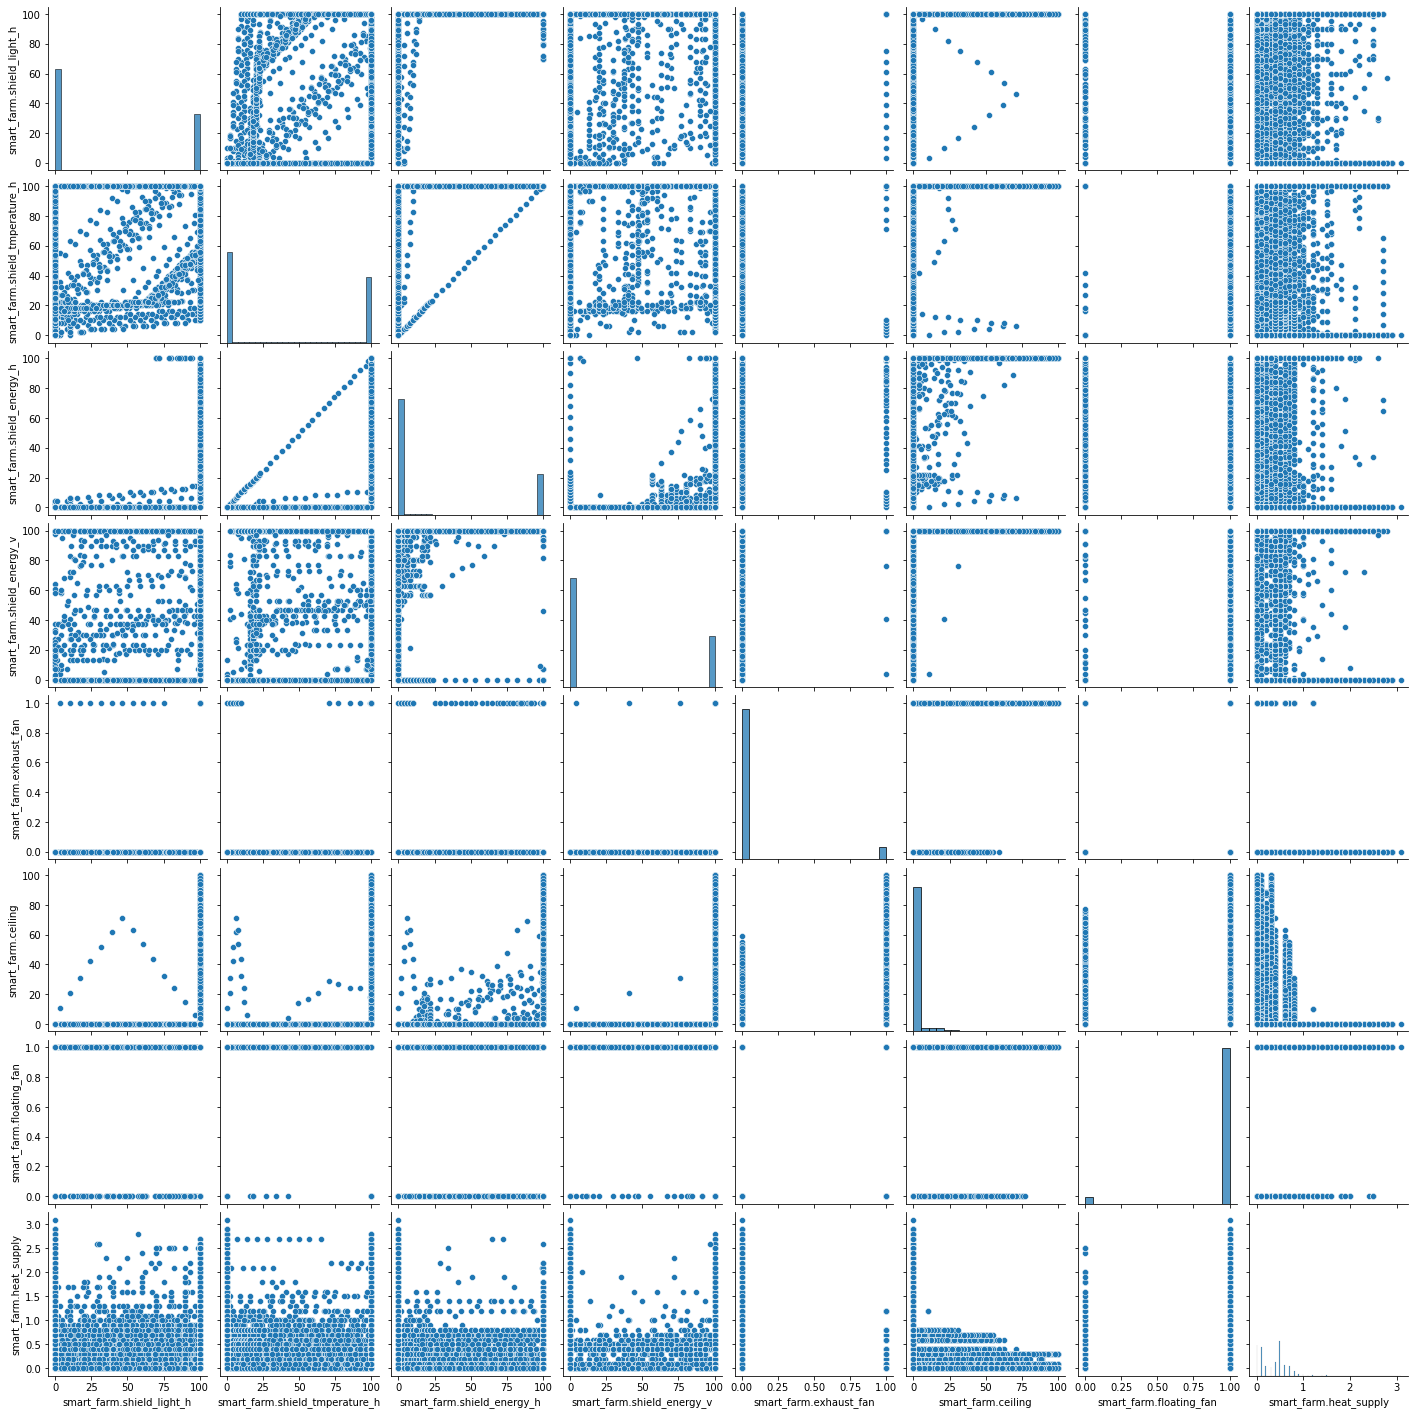

In [54]:
sns.pairplot(train[['smart_farm.shield_light_h',\
       'smart_farm.shield_tmperature_h', 'smart_farm.shield_energy_h',\
       'smart_farm.shield_energy_v', 'smart_farm.exhaust_fan',\
       'smart_farm.ceiling', 'smart_farm.floating_fan','smart_farm.heat_supply']])

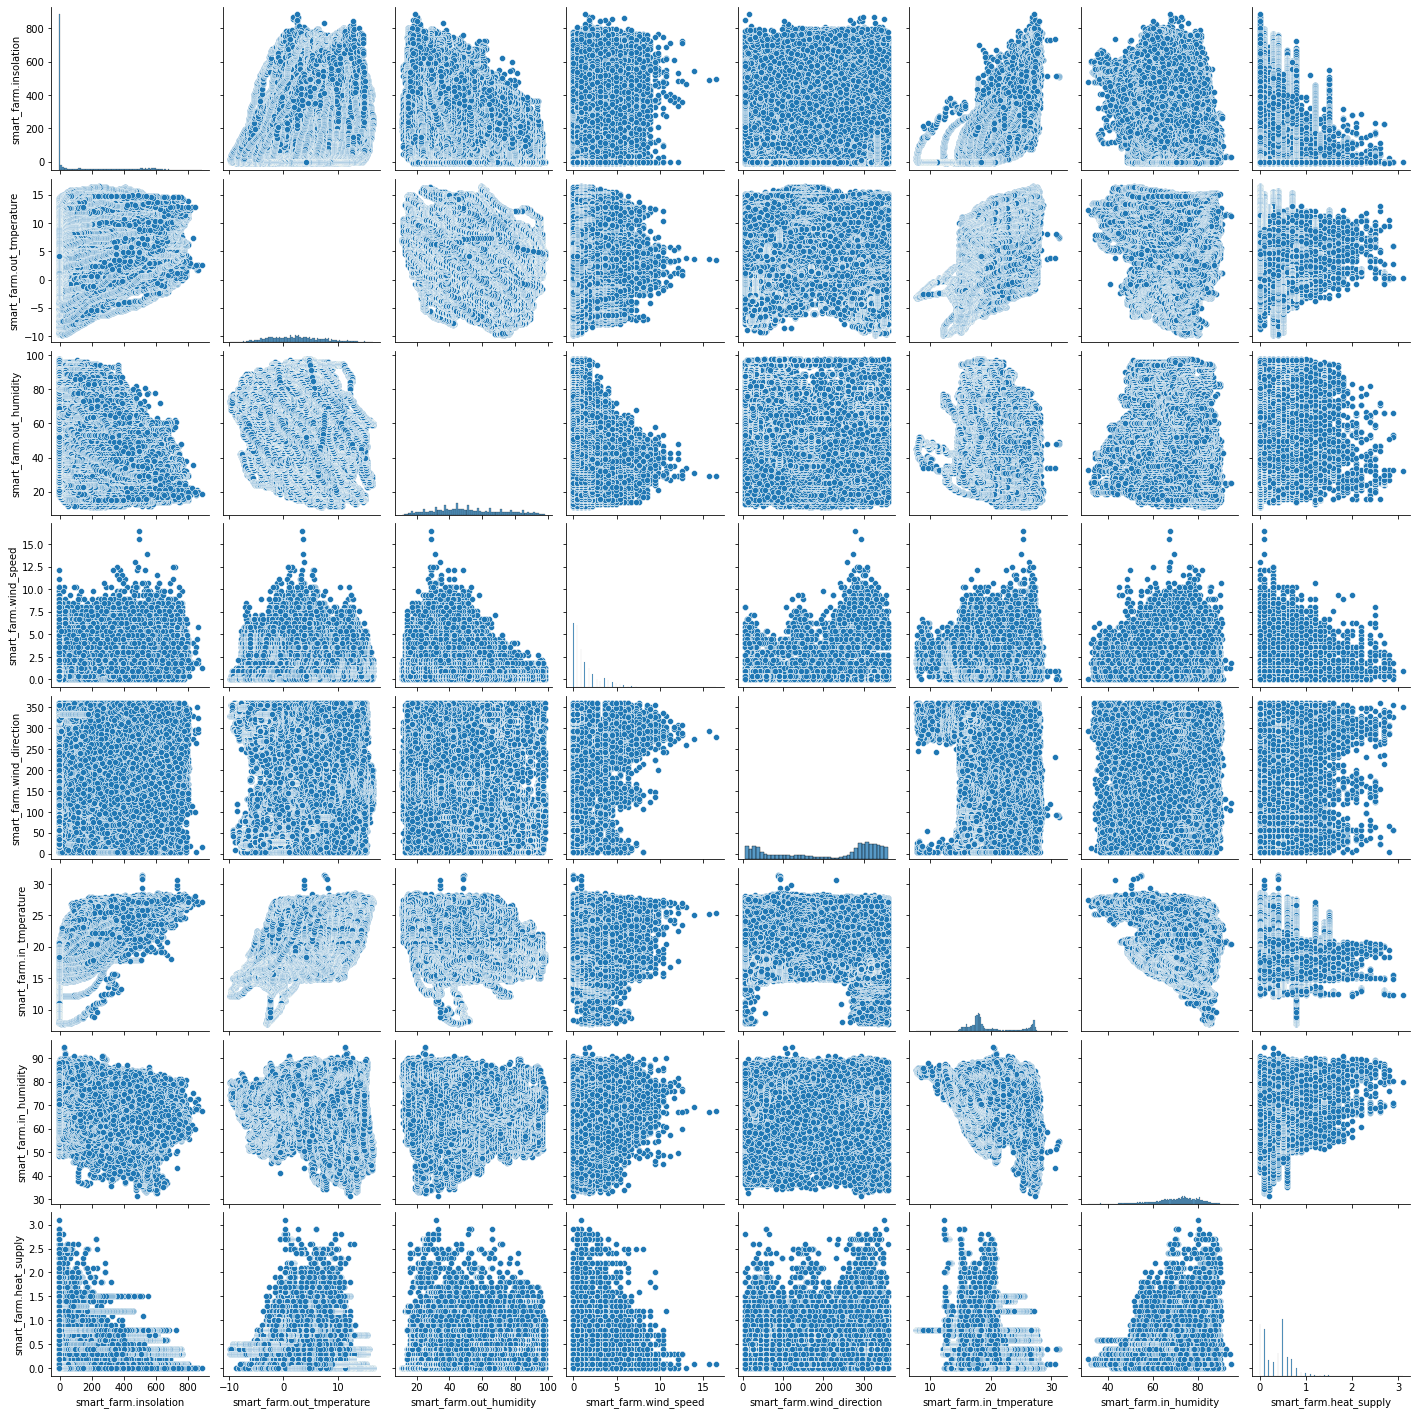

In [55]:
sns.pairplot(train[['smart_farm.insolation', 'smart_farm.out_tmperature',\
       'smart_farm.out_humidity', 'smart_farm.wind_speed',\
       'smart_farm.wind_direction', 'smart_farm.in_tmperature',\
       'smart_farm.in_humidity','smart_farm.heat_supply']])

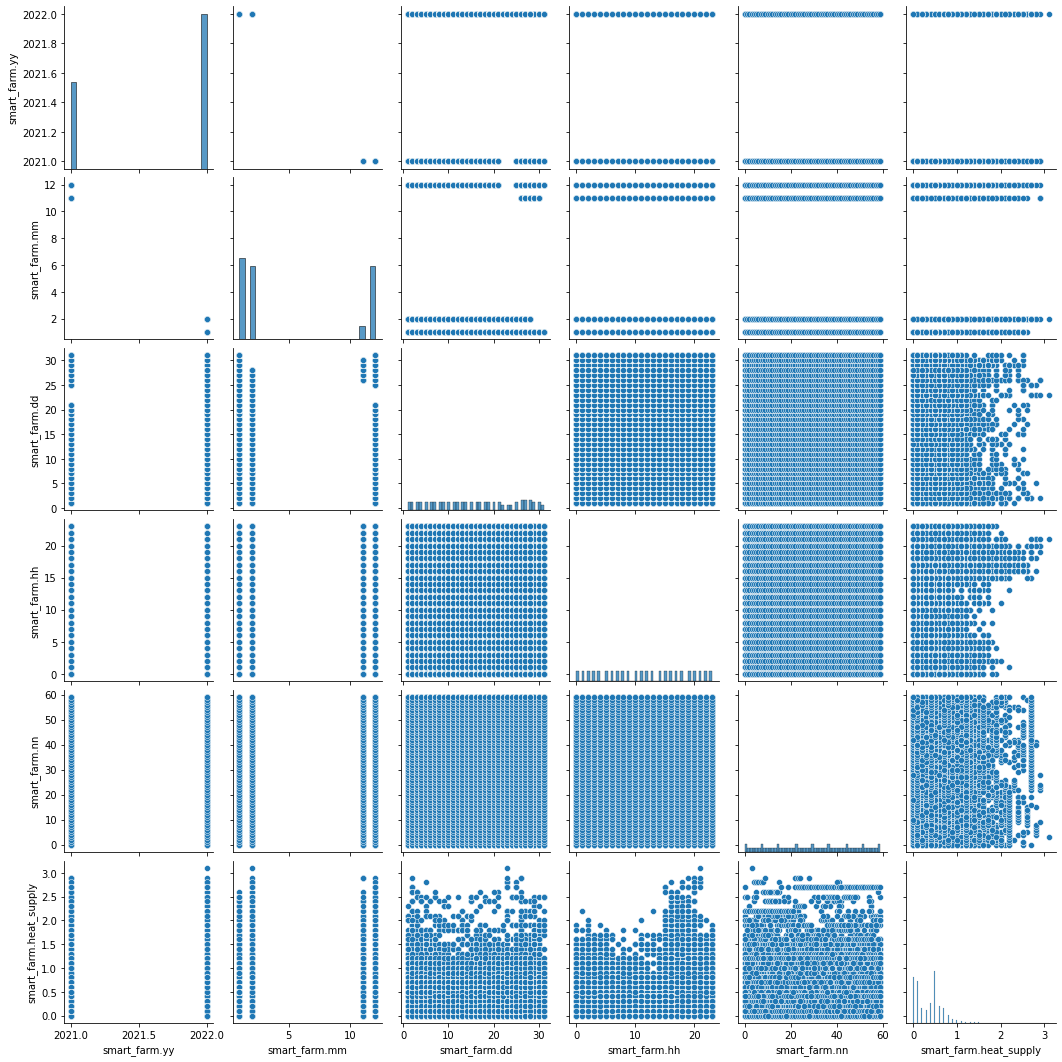

In [56]:
sns.pairplot(train[['smart_farm.yy', 'smart_farm.mm', 'smart_farm.dd', 'smart_farm.hh',\
       'smart_farm.nn','smart_farm.heat_supply']])

# Model

In [49]:
train.columns

Index(['smart_farm.yy', 'smart_farm.mm', 'smart_farm.dd', 'smart_farm.hh',
       'smart_farm.nn', 'smart_farm.insolation', 'smart_farm.out_tmperature',
       'smart_farm.out_humidity', 'smart_farm.wind_speed',
       'smart_farm.wind_direction', 'smart_farm.in_tmperature',
       'smart_farm.in_humidity', 'smart_farm.shield_light_h',
       'smart_farm.shield_tmperature_h', 'smart_farm.shield_energy_h',
       'smart_farm.shield_energy_v', 'smart_farm.exhaust_fan',
       'smart_farm.ceiling', 'smart_farm.floating_fan',
       'smart_farm.fan_coil_b_site',
       'smart_farm.ventilation_temperature_control',
       'smart_farm.heating_temperature_set_up', 'smart_farm.heat_supply'],
      dtype='object')

In [120]:
# max_depth = 5
# n_estimators = 5000             # 400  #1000
# lr = 0.01             # 0.017
# num_leaves = 100
# early_stopping_rounds = 300      # 100
# verbose = True                  # True

In [121]:
'smart_farm.insolation','smart_farm.in_tmperature', 'smart_farm.shield_light_h','smart_farm.shield_tmperature_h', \
'smart_farm.shield_energy_h','smart_farm.shield_energy_v','smart_farm.fan_coil_b_site'

('smart_farm.insolation',
 'smart_farm.in_tmperature',
 'smart_farm.shield_light_h',
 'smart_farm.shield_tmperature_h',
 'smart_farm.shield_energy_h',
 'smart_farm.shield_energy_v',
 'smart_farm.fan_coil_b_site')

In [58]:
# 결측치 제거한 train1,test1에 대해서
# X = train1.drop('smart_farm.heat_supply', axis=1)
X = train1[['smart_farm.insolation','smart_farm.wind_speed','smart_farm.in_humidity']]
# X = train1.drop(['smart_farm.yy', 'smart_farm.mm', 'smart_farm.dd', 'smart_farm.hh','smart_farm.nn','smart_farm.heat_supply'], axis=1)
y = train1[['smart_farm.heat_supply']].values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

# X_test = test1.drop('smart_farm.heat_supply', axis=1)
X_test = test1[['smart_farm.insolation','smart_farm.wind_speed','smart_farm.in_humidity']]
# X_test = test1.drop(['smart_farm.yy', 'smart_farm.mm', 'smart_farm.dd', 'smart_farm.hh','smart_farm.nn','smart_farm.heat_supply'], axis=1)

In [59]:
# # 결측치 제거한 train1,test1에 대해서
# X = train1.drop(['smart_farm.yy', 'smart_farm.mm', 'smart_farm.dd', 'smart_farm.hh', 'smart_farm.nn', 'smart_farm.heat_supply'], axis=1)
# y = train1[['smart_farm.heat_supply']].values

# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

# X_test = test1.drop(['smart_farm.yy', 'smart_farm.mm', 'smart_farm.dd', 'smart_farm.hh', 'smart_farm.nn', 'smart_farm.heat_supply'],axis=1)

In [60]:
# X_train = train.drop(['smart_farm.yy', 'smart_farm.mm', 'smart_farm.dd', 'smart_farm.hh', 'smart_farm.nn', 'smart_farm.heat_supply'], axis=1)
# X_val = val.drop(['smart_farm.yy', 'smart_farm.mm', 'smart_farm.dd', 'smart_farm.hh', 'smart_farm.nn', 'smart_farm.heat_supply'],axis=1)

# y_train = train[['smart_farm.heat_supply']].values
# y_val = val[['smart_farm.heat_supply']].values

# lgbm_reg = LGBMRegressor(objective= "regression",
#                      max_depth= max_depth,
#                      n_estimators= n_estimators,
#                      learning_rate= lr,
#                      num_leaves = num_leaves)
    
# lgbm_reg.fit(X_train, y_train,
#           eval_set=[(X_val, y_val)],
#           eval_metric=["mse"],
#           early_stopping_rounds=early_stopping_rounds,
#           verbose=verbose) 

xgb_model = xgb.XGBRegressor(n_estimators = 2000, learning_rate = 0.01, max_depth=11, subsample=0.5,colsample_bytree=0.7, random_state = 2000)

xgb_model.fit(X_train,y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=15)


[0]	validation_0-rmse:0.34365
[1]	validation_0-rmse:0.34251
[2]	validation_0-rmse:0.34180


C:\Users\wjd72\anaconda3\envs\tensorflow_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:0.34108
[4]	validation_0-rmse:0.34005
[5]	validation_0-rmse:0.33904
[6]	validation_0-rmse:0.33797
[7]	validation_0-rmse:0.33700
[8]	validation_0-rmse:0.33597
[9]	validation_0-rmse:0.33532
[10]	validation_0-rmse:0.33439
[11]	validation_0-rmse:0.33378
[12]	validation_0-rmse:0.33280
[13]	validation_0-rmse:0.33183
[14]	validation_0-rmse:0.33124
[15]	validation_0-rmse:0.33029
[16]	validation_0-rmse:0.32943
[17]	validation_0-rmse:0.32851
[18]	validation_0-rmse:0.32769
[19]	validation_0-rmse:0.32689
[20]	validation_0-rmse:0.32601
[21]	validation_0-rmse:0.32549
[22]	validation_0-rmse:0.32471
[23]	validation_0-rmse:0.32395
[24]	validation_0-rmse:0.32312
[25]	validation_0-rmse:0.32239
[26]	validation_0-rmse:0.32190
[27]	validation_0-rmse:0.32113
[28]	validation_0-rmse:0.32036
[29]	validation_0-rmse:0.31990
[30]	validation_0-rmse:0.31947
[31]	validation_0-rmse:0.31873
[32]	validation_0-rmse:0.31806
[33]	validation_0-rmse:0.31740
[34]	validation_0-rmse:0.31676
[35]	validation

[263]	validation_0-rmse:0.28060
[264]	validation_0-rmse:0.28060
[265]	validation_0-rmse:0.28059
[266]	validation_0-rmse:0.28058
[267]	validation_0-rmse:0.28056
[268]	validation_0-rmse:0.28053
[269]	validation_0-rmse:0.28050
[270]	validation_0-rmse:0.28050
[271]	validation_0-rmse:0.28048
[272]	validation_0-rmse:0.28046
[273]	validation_0-rmse:0.28045
[274]	validation_0-rmse:0.28045
[275]	validation_0-rmse:0.28045
[276]	validation_0-rmse:0.28046
[277]	validation_0-rmse:0.28044
[278]	validation_0-rmse:0.28042
[279]	validation_0-rmse:0.28041
[280]	validation_0-rmse:0.28040
[281]	validation_0-rmse:0.28040
[282]	validation_0-rmse:0.28037
[283]	validation_0-rmse:0.28036
[284]	validation_0-rmse:0.28036
[285]	validation_0-rmse:0.28036
[286]	validation_0-rmse:0.28035
[287]	validation_0-rmse:0.28034
[288]	validation_0-rmse:0.28032
[289]	validation_0-rmse:0.28029
[290]	validation_0-rmse:0.28026
[291]	validation_0-rmse:0.28026
[292]	validation_0-rmse:0.28025
[293]	validation_0-rmse:0.28025
[294]	va

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=11, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=2000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=2000,
             reg_alpha=0, reg_lambda=1, ...)

Text(0.5, 1.0, 'Feature Importance')

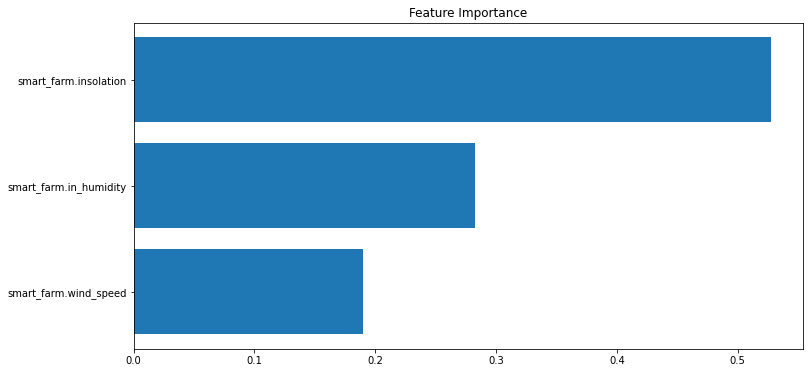

In [61]:
feature_importance = xgb_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_val.columns)[sorted_idx])
plt.title('Feature Importance')

Text(0.5, 1.0, 'Feature Importance')

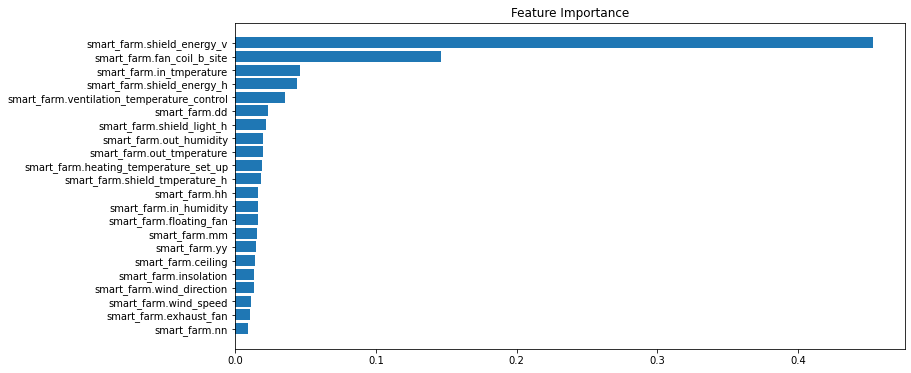

In [22]:
feature_importance = xgb_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_val.columns)[sorted_idx])
plt.title('Feature Importance')

In [62]:
pred_ = xgb_model.predict(X_test)
pred_                                # 1440개씩 평균지어

array([0.47086775, 0.46583885, 0.48208177, ..., 0.4649349 , 0.4472183 ,
       0.4804487 ], dtype=float32)

In [24]:
len(pred_)

18720

In [25]:
from scipy.stats import mode
mode(pred_)[0][0]

0.32035038

In [26]:
len(pred_)/1440

13.0

In [63]:
# 평균
pred = []
for i in range(int(len(pred_)/1440)):
    pred.append(np.mean(pred_[1440*i:1440*(i+1)]))
pred
len(pred)

## 최대값
pred1 = []
for i in range(int(len(pred_)/1440)):
    pred1.append(np.max(pred_[1440*i:1440*(i+1)]))
pred1
len(pred1)

## 최빈값
pred2 = []
for i in range(int(len(pred_)/1440)):
    pred2.append(mode(pred_[1440*i:1440*(i+1)])[0][0])
pred2
len(pred2)

## 최빈값
pred3 = []
for i in range(int(len(pred_)/1440)):
    pred3.append(np.median(pred_[1440*i:1440*(i+1)]))
pred3
len(pred3)

13

In [64]:
# # pred = lgbm_reg.predict(X_test)
# submission=pd.read_csv('1-1_검증데이터셋.csv', encoding='utf-8')
# submission1=submission.copy()
submission1['heat_supply_day2'] = pred
submission1 
# submission1.to_csv("farm_lgbm.csv", index = False)            # 6위

,yy,mm,dd,heat_supply_day1,heat_supply_day2
0,2022,3,4,NaN,0.360891
1,2022,3,5,NaN,0.311368
2,2022,3,6,NaN,0.316055
3,2022,3,7,NaN,0.348503
4,2022,3,8,NaN,0.337066
5,2022,3,9,NaN,0.337331
6,2022,3,10,NaN,0.330675
7,2022,3,11,NaN,0.332449
8,2022,3,12,NaN,0.306958
9,2022,3,13,NaN,0.391119


In [65]:
submission1['heat_supply_day2'] = pred1
submission1
# submission1.to_csv("farm_no_outlier_xgb_all.csv", index = False)       # 4위 (max로 ㄱㄱ)

,yy,mm,dd,heat_supply_day1,heat_supply_day2
0,2022,3,4,NaN,0.761112
1,2022,3,5,NaN,0.766682
2,2022,3,6,NaN,0.638426
3,2022,3,7,NaN,0.764428
4,2022,3,8,NaN,0.740893
5,2022,3,9,NaN,0.809291
6,2022,3,10,NaN,0.665321
7,2022,3,11,NaN,0.852274
8,2022,3,12,NaN,0.769379
9,2022,3,13,NaN,0.860113


In [49]:
submission1['heat_supply_day2'] = pred2
submission1
# submission1.to_csv("farm_lgbm_mode.csv", index = False)       #6위

,yy,mm,dd,heat_supply_day1,heat_supply_day2
0,2022,3,4,NaN,0.500005
1,2022,3,5,NaN,0.322959
2,2022,3,6,NaN,-0.050492
3,2022,3,7,NaN,0.547441
4,2022,3,8,NaN,0.398654
5,2022,3,9,NaN,0.605002
6,2022,3,10,NaN,0.542308
7,2022,3,11,NaN,0.155853
8,2022,3,12,NaN,0.216538
9,2022,3,13,NaN,0.412123


In [31]:
submission1['heat_supply_day2'] = pred3
submission1
# submission1.to_csv("farm_lgbm_med.csv", index = False)       #6위

,yy,mm,dd,heat_supply_day1,heat_supply_day2
0,2022,3,4,NaN,0.365814
1,2022,3,5,NaN,0.409651
2,2022,3,6,NaN,0.330201
3,2022,3,7,NaN,0.592679
4,2022,3,8,NaN,0.410555
5,2022,3,9,NaN,0.241107
6,2022,3,10,NaN,0.212049
7,2022,3,11,NaN,0.295998
8,2022,3,12,NaN,0.298997
9,2022,3,13,NaN,0.501673


In [ ]:
# lgbm 0.06/ xgb 0.19